# Car Price Prediction <br><sup>Machine Learning Regression Algorithm Selection</sup></br>

*Eduardo Solano Jaime*

*0213663*

*ECID*

*Universidad Panamericana campus Guadalajara*

[Dataset](https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset?select=heart.csv)

In [1]:
import pandas as pd

df = pd.read_csv('heart.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [2]:
df.head(5)

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

In [22]:
features = df.columns.values
numeric = ['age', 'trtbps',	'chol', 'thalachh',	'oldpeak']
onehot =  ['cp', 'restecg', 'slp', 'caa', 'thall']

In [4]:
print(f"The original DataFrame has a shape of {df.shape}")

The original DataFrame has a shape of (303, 14)


In [5]:
df.info() # Instead of dtype, it gives more information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.describe()

age         sex          cp      trtbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg    thalachh        exng     oldpeak         slp         caa  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

            thall      output  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [8]:
target = 'output'
display(df.groupby([target]).count())

age  sex   cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  \
output                                                                       
0       138  138  138     138   138  138      138       138   138      138   
1       165  165  165     165   165  165      165       165   165      165   

        slp  caa  thall  
output                   
0       138  138    138  
1       165  165    165

In [18]:
import seaborn as sea

sea.set_theme()
sea.set_context('talk')

c:\Users\Eduardo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


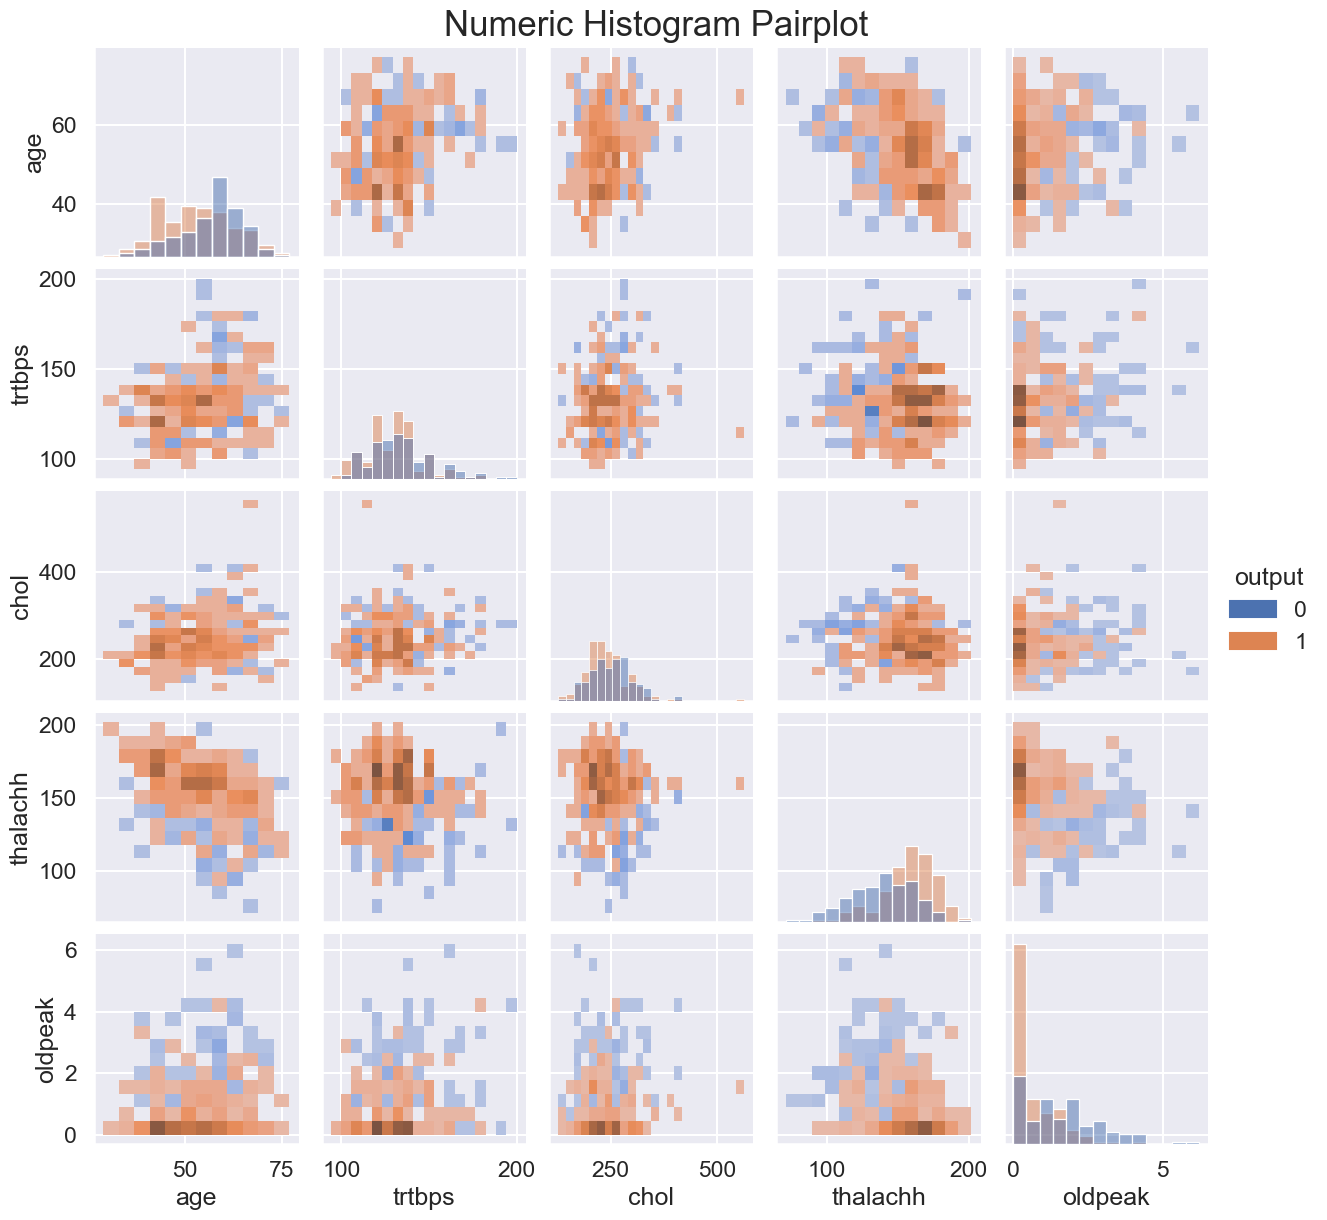

In [21]:
aux = numeric + [target]
f = sea.pairplot(df[aux], hue=target, kind='hist')
name = "Numeric Histogram Pairplot"
f.fig.subplots_adjust(top=.95)
f.fig.suptitle(name, size=25)
f.savefig(name, dpi=600)

c:\Users\Eduardo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


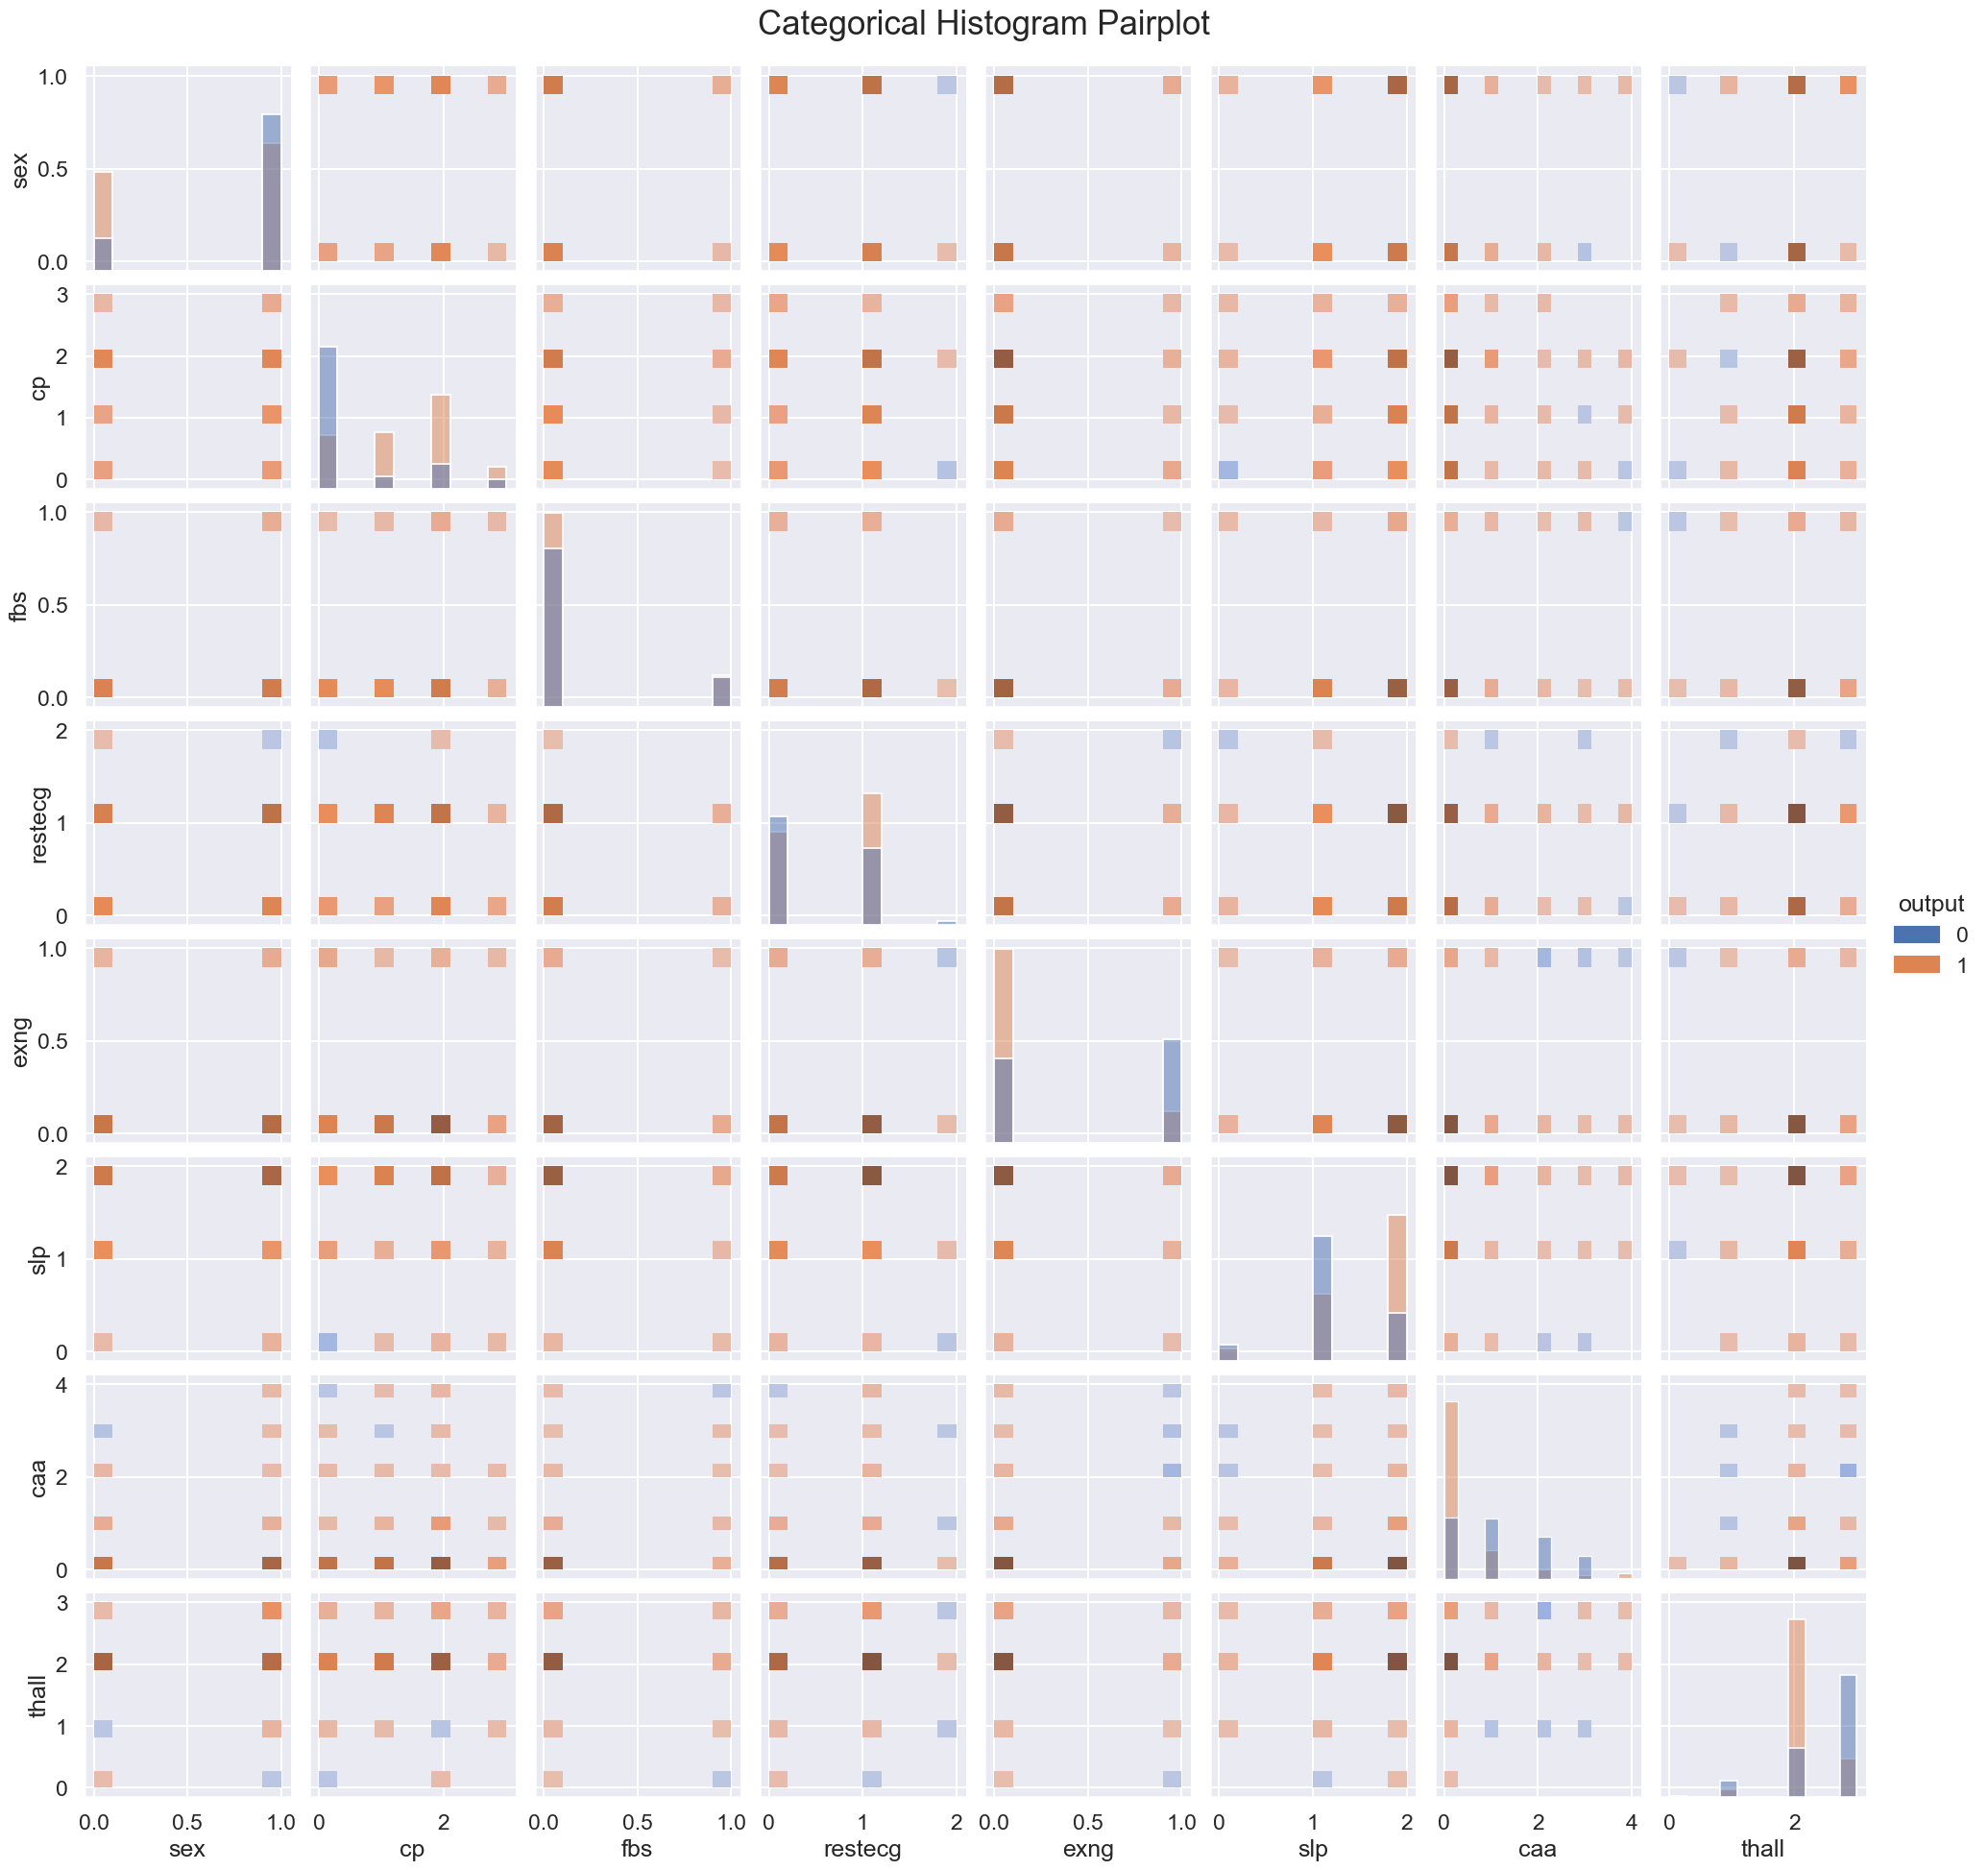

In [30]:
aux = [x for x in features if x not in numeric]
f = sea.pairplot(df[aux], hue=target, kind='hist')
name = "Categorical Histogram Pairplot"
f.fig.subplots_adjust(top=.95)
f.fig.suptitle(name, size=25)
f.savefig(name, dpi=600)

c:\Users\Eduardo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


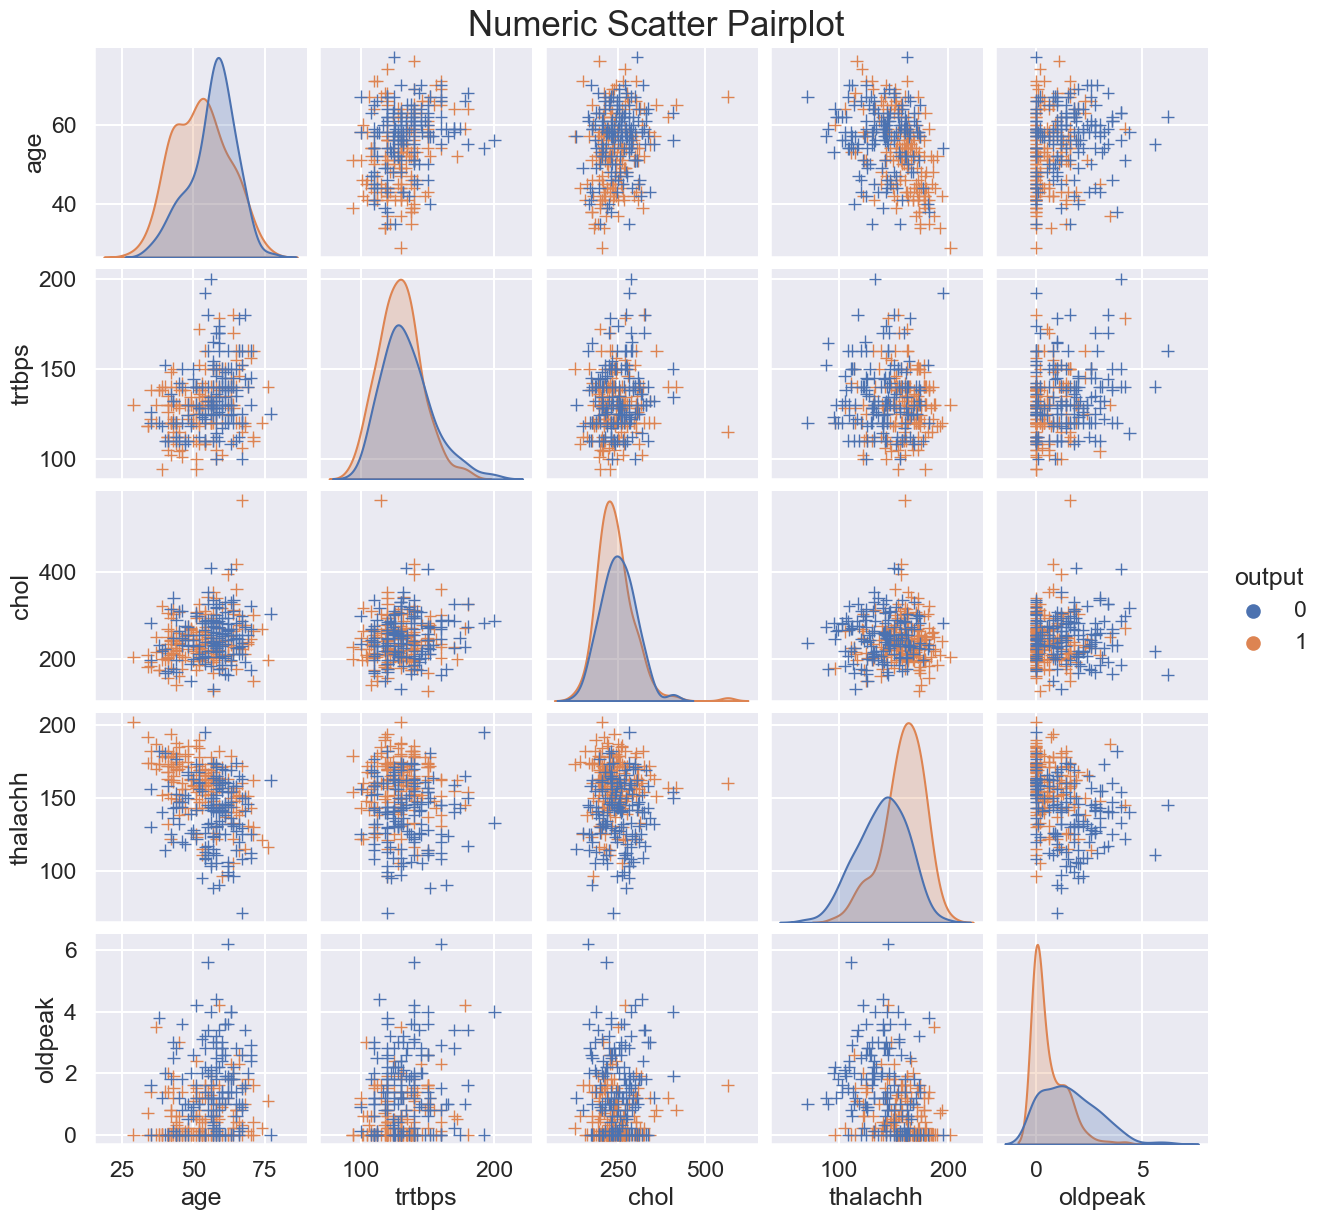

In [32]:
aux = numeric + [target]
f = sea.pairplot(df[aux], hue=target,  plot_kws=dict(marker="+", linewidth=1), kind='scatter')
name = "Numeric Scatter Pairplot"
f.fig.subplots_adjust(top=.95)
f.fig.suptitle(name, size=25)
f.savefig(name, dpi=600)

c:\Users\Eduardo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


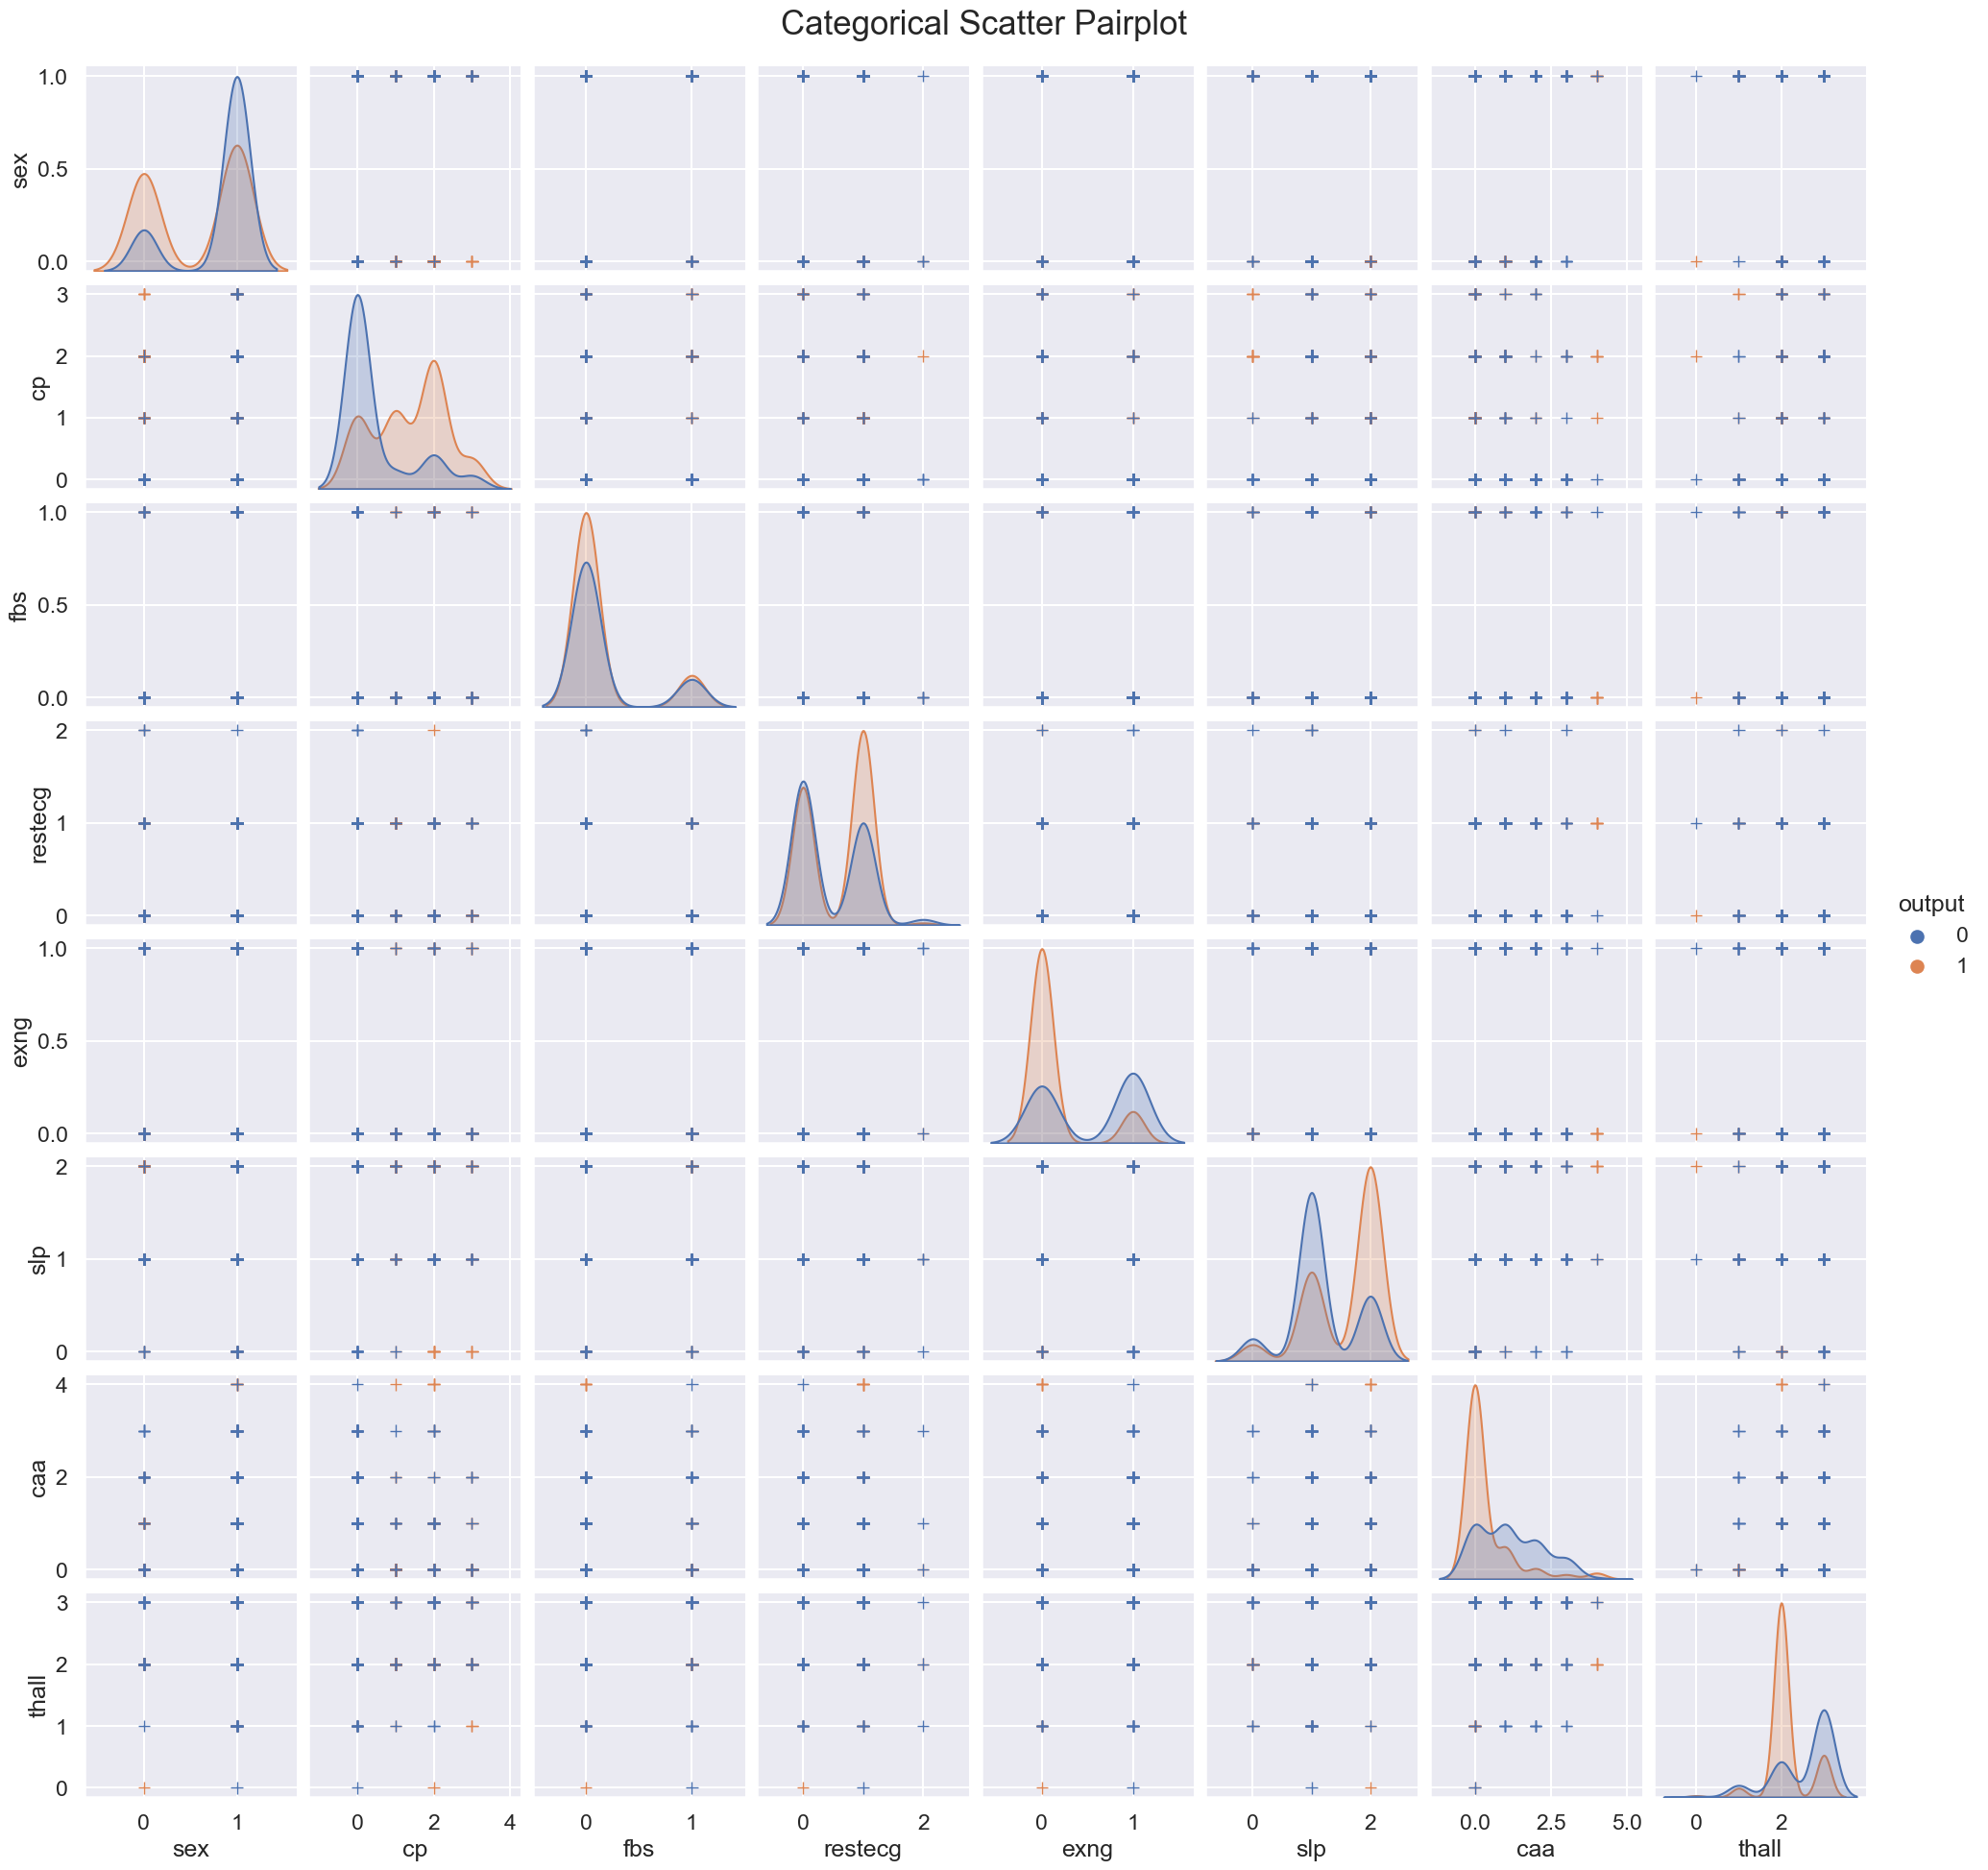

In [33]:
aux = [x for x in features if x not in numeric]
f = sea.pairplot(df[aux], hue=target,  plot_kws=dict(marker="+", linewidth=1), kind='scatter')
name = "Categorical Scatter Pairplot"
f.fig.subplots_adjust(top=.95)
f.fig.suptitle(name, size=25)
f.savefig(name, dpi=600)

c:\Users\Eduardo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


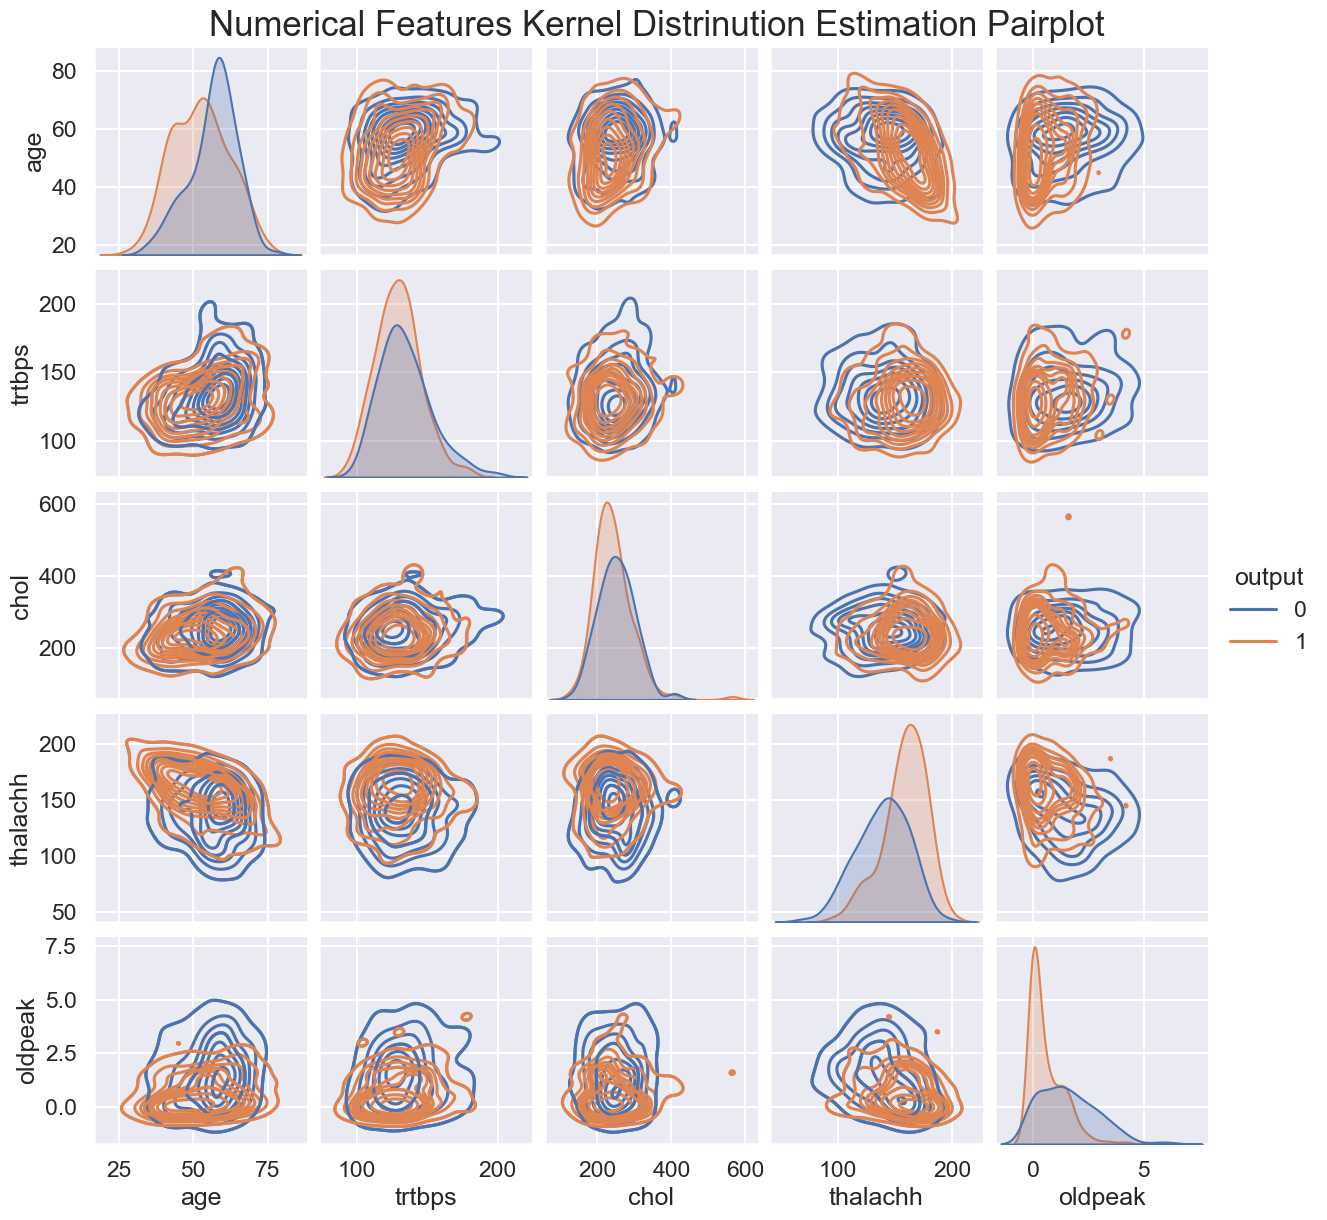

In [37]:
aux = numeric + [target]
f = sea.pairplot(df[aux], hue=target,  kind='kde')
f.map_lower(sea.kdeplot, levels=4, color = (0.1, 0.3, 0.5, 0.2))
name = "Numerical Features Kernel Distrinution Estimation Pairplot"
f.fig.subplots_adjust(top=.95)
f.fig.suptitle(name, size=25)
f.savefig(name, dpi=600)

c:\Users\Eduardo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


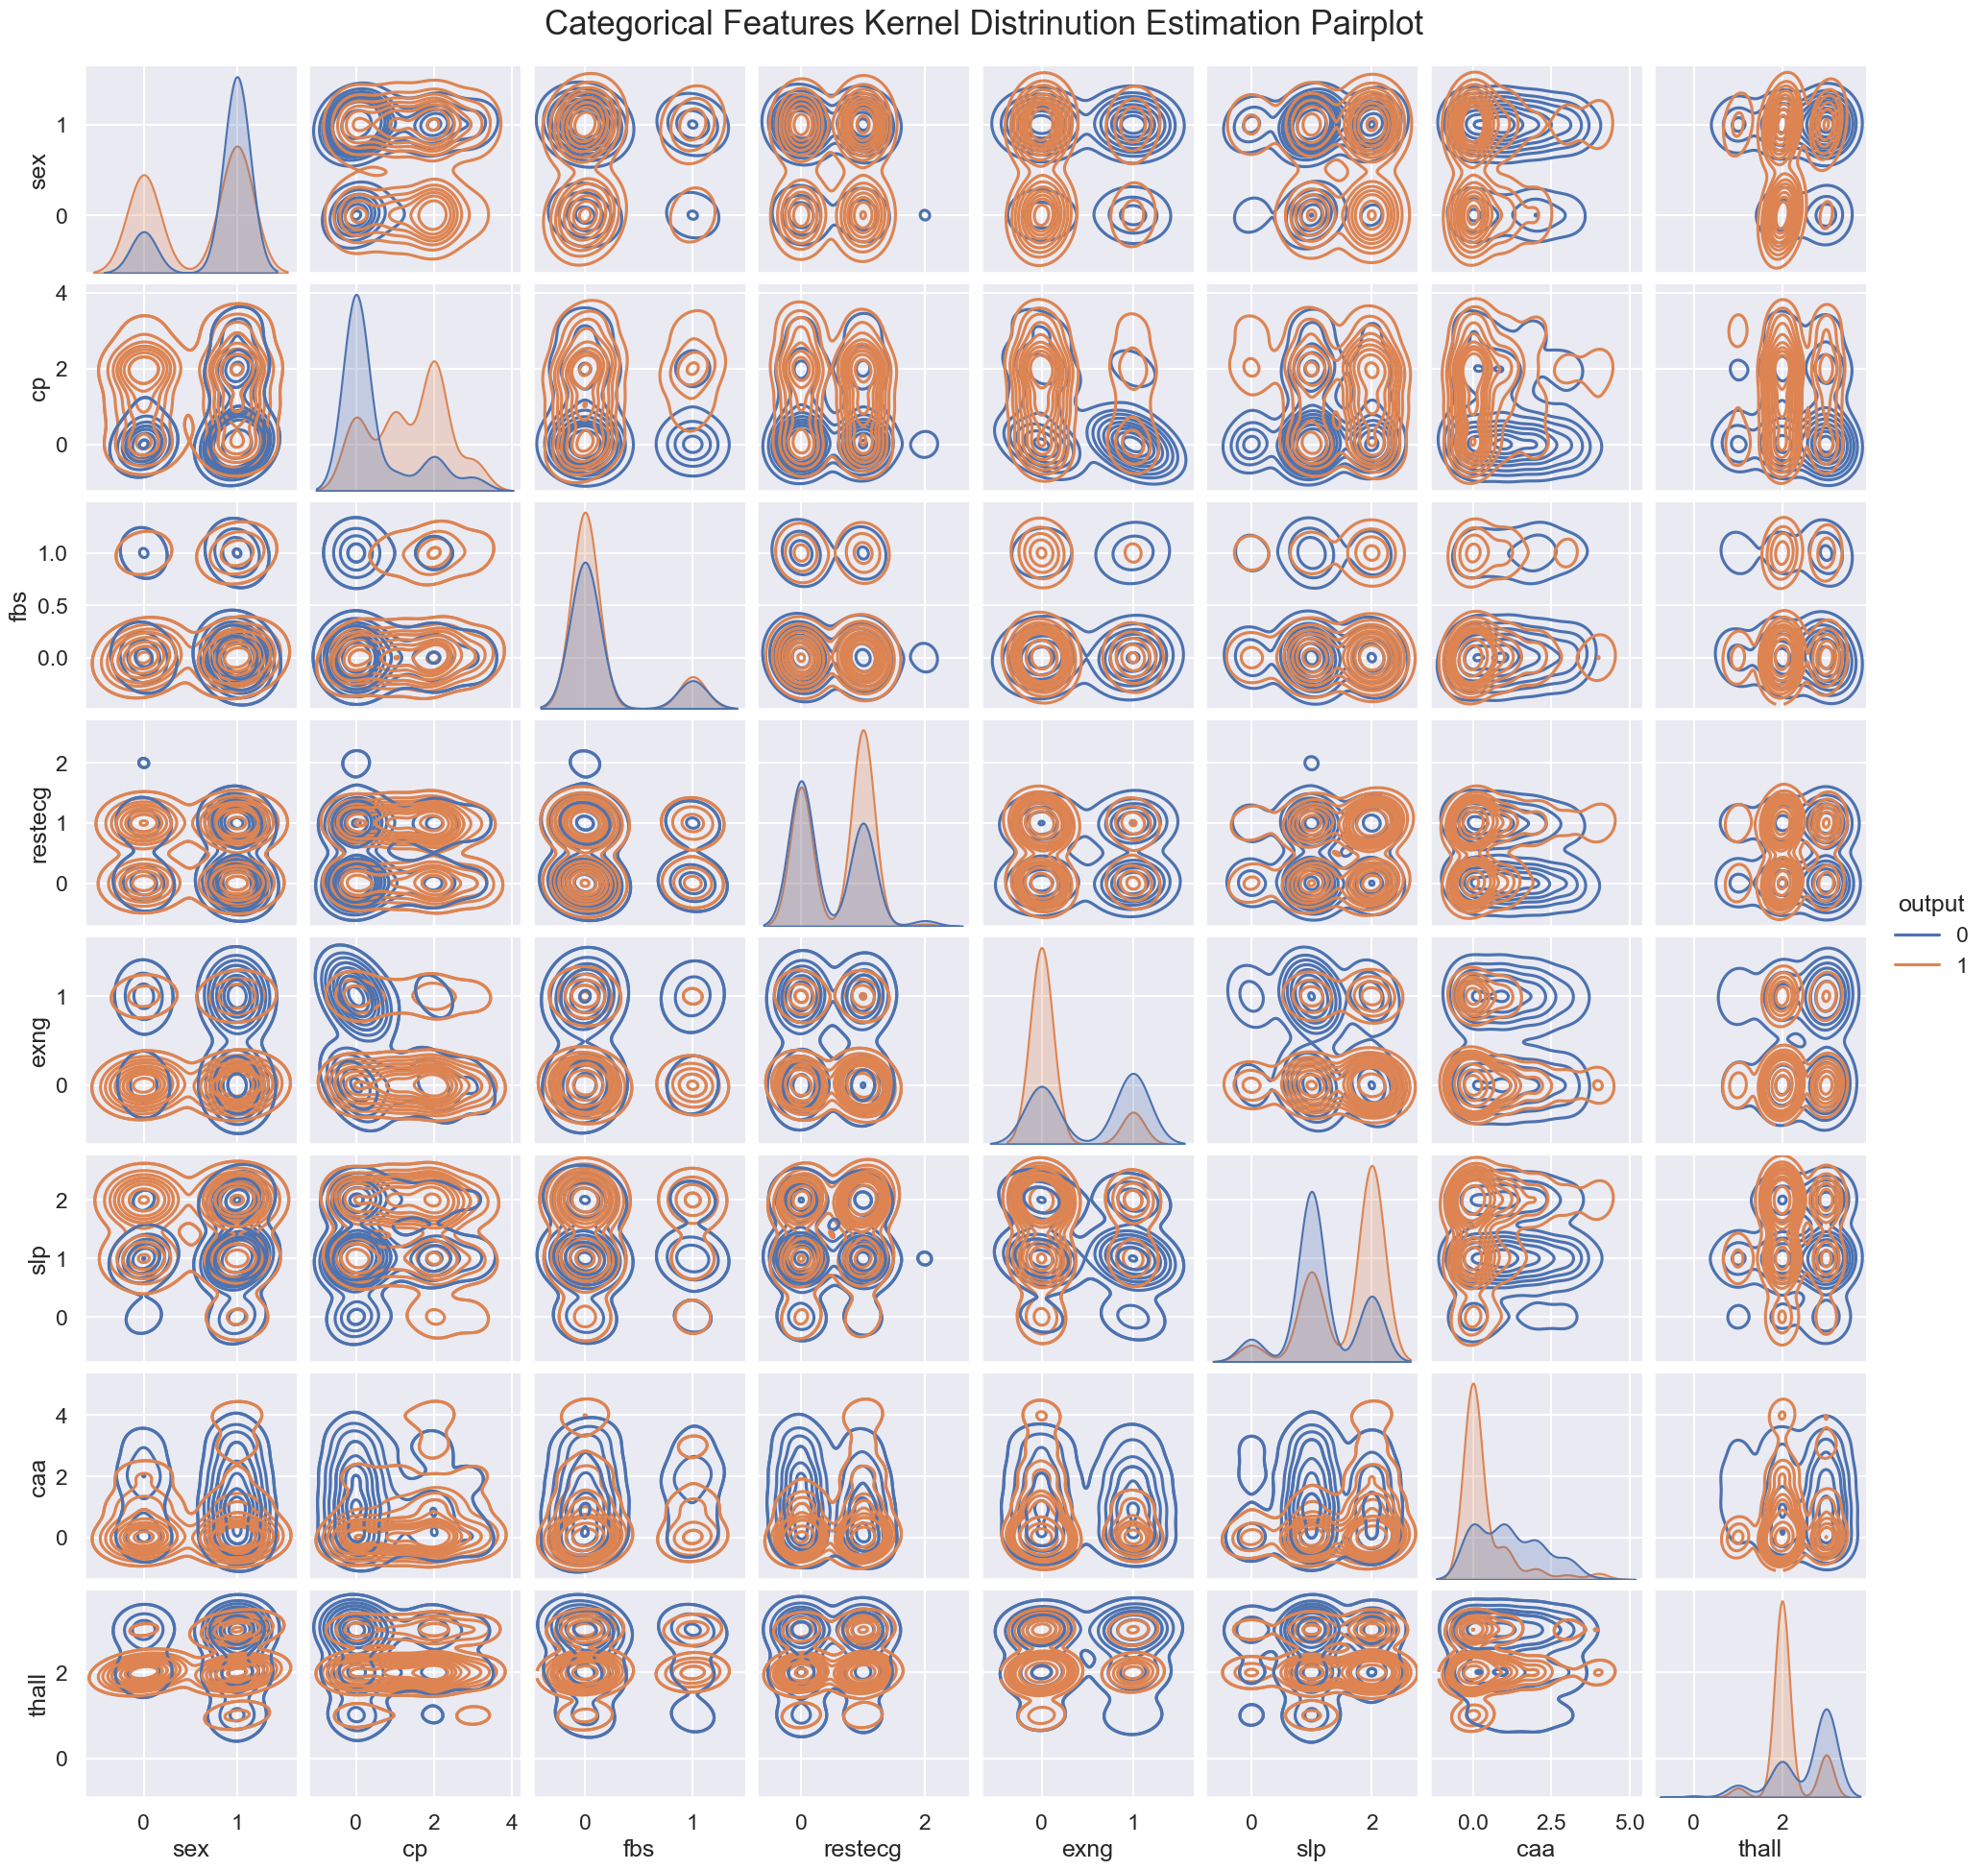

In [38]:
aux = [x for x in features if x not in numeric]
f = sea.pairplot(df[aux], hue=target,  kind='kde')
f.map_lower(sea.kdeplot, levels=4, color = (0.1, 0.3, 0.5, 0.2))
name = "Categorical Features Kernel Distrinution Estimation Pairplot"
f.fig.subplots_adjust(top=.95)
f.fig.suptitle(name, size=25)
f.savefig(name, dpi=600)

In [13]:
sea.set_context("paper")

In [60]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

def Transform(data):
    ct = ColumnTransformer(transformers=
                        [('numeric', StandardScaler(), numeric),
                        ('work', OneHotEncoder(), onehot)],
                        remainder='passthrough')

    data_t = pd.DataFrame(ct.fit_transform(data))
    data_t.columns = [s[s.find('_')+2:] for s in list(ct.get_feature_names_out())]
    return data_t
        
df_t = Transform(df)

In [15]:
df_t.dtypes

age          float64
trtbps       float64
chol         float64
thalachh     float64
oldpeak      float64
cp_0         float64
cp_1         float64
cp_2         float64
cp_3         float64
restecg_0    float64
restecg_1    float64
restecg_2    float64
slp_0        float64
slp_1        float64
slp_2        float64
caa_0        float64
caa_1        float64
caa_2        float64
caa_3        float64
caa_4        float64
thall_0      float64
thall_1      float64
thall_2      float64
thall_3      float64
sex          float64
fbs          float64
exng         float64
output       float64
dtype: object

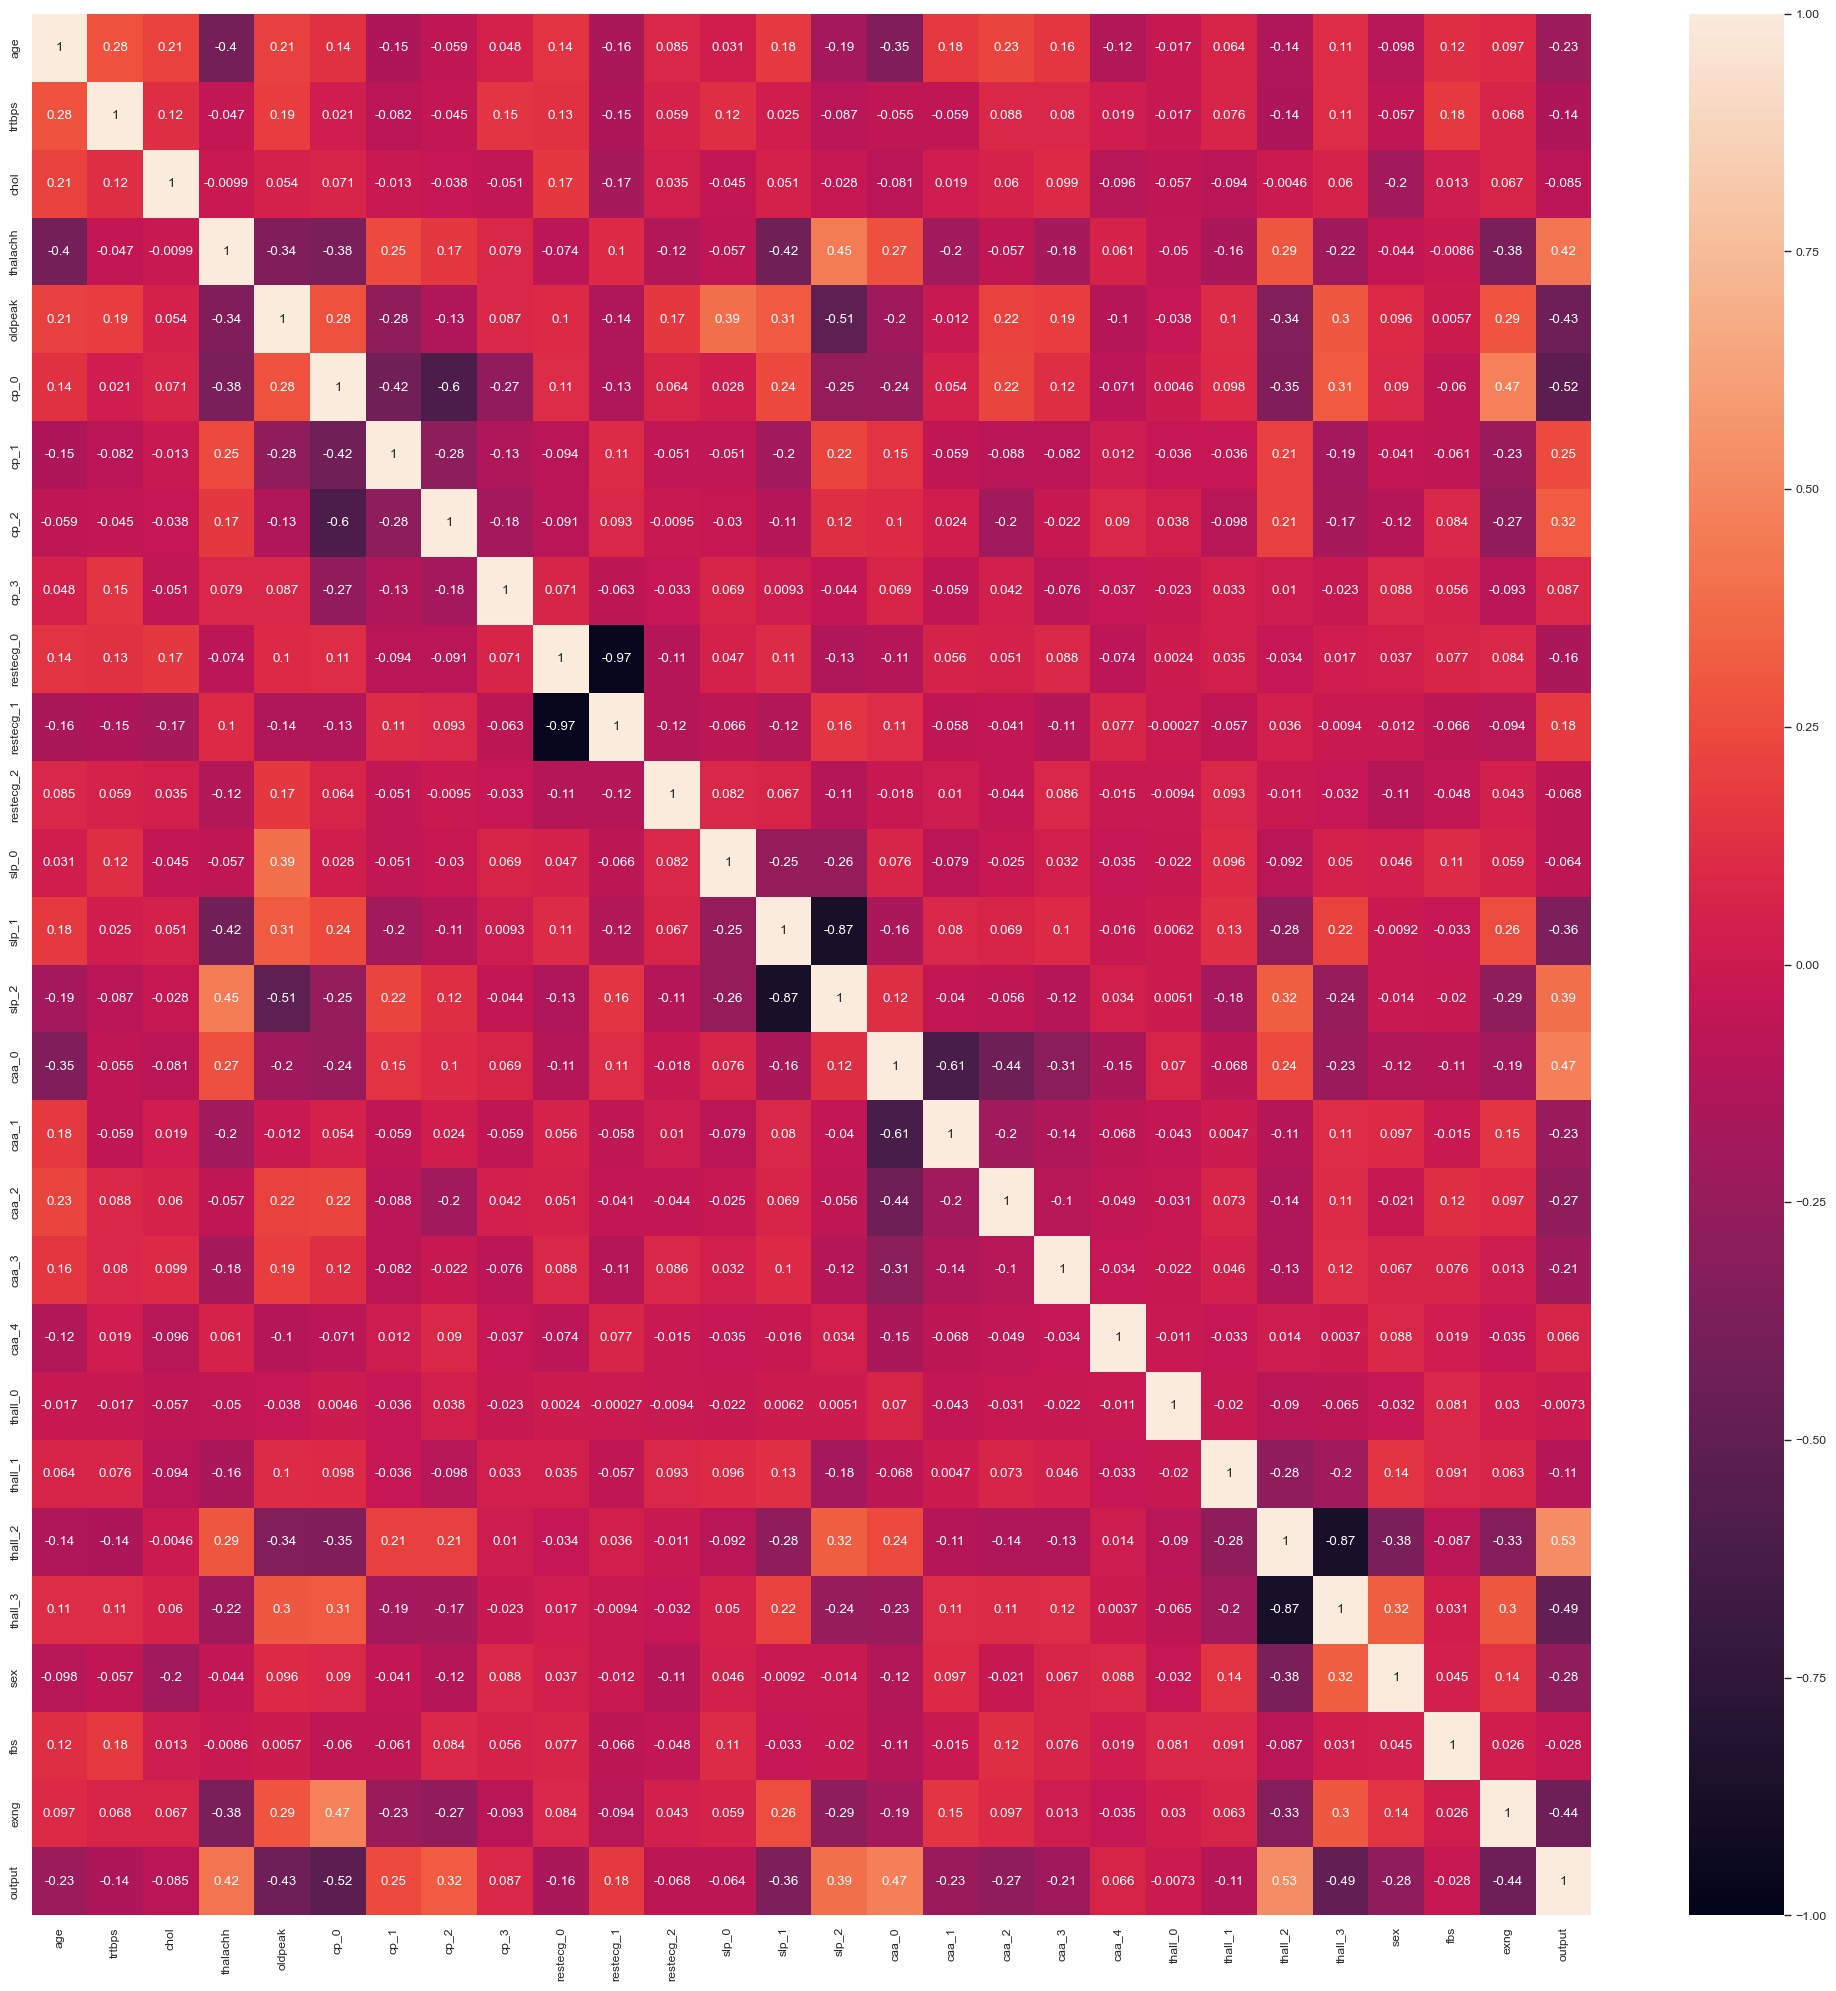

In [61]:
import matplotlib.pyplot as plt

correlation = df_t.corr()
fig = plt.figure(figsize=(20, 20))
sea.heatmap(correlation, annot=True, vmin=-1, vmax=1)
fig.tight_layout()
fig.savefig('Heatmap', dpi=600)

In [62]:
import numpy as np
corr = correlation.abs() # type: ignore
up = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

to_drop = corr[target][corr[target]<0.05].index.values
print(to_drop)

def Irrelevant(data, to_drop):
    return data.drop(to_drop, axis=1)

df_t = Irrelevant(df_t, to_drop)
df_t.sample(3)

['thall_0' 'fbs']


age    trtbps      chol  thalachh   oldpeak  cp_0  cp_1  cp_2  cp_3  \
270 -0.922713 -0.663867  0.052874 -0.246940 -0.206705   1.0   0.0   0.0   0.0   
58  -2.246179 -0.778093 -1.241933  1.064975 -0.896862   0.0   0.0   0.0   1.0   
105  1.503641 -0.663867 -0.681494 -1.515125  0.397182   0.0   0.0   1.0   0.0   

     restecg_0  ...  caa_1  caa_2  caa_3  caa_4  thall_1  thall_2  thall_3  \
270        1.0  ...    0.0    0.0    0.0    0.0      0.0      0.0      1.0   
58         1.0  ...    0.0    0.0    0.0    0.0      0.0      1.0      0.0   
105        1.0  ...    0.0    0.0    0.0    0.0      0.0      1.0      0.0   

     sex  exng  output  
270  1.0   0.0     0.0  
58   1.0   0.0     1.0  
105  0.0   0.0     1.0  

[3 rows x 26 columns]

C:\Users\Eduardo\AppData\Local\Temp\ipykernel_14320\1818145395.py:50: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


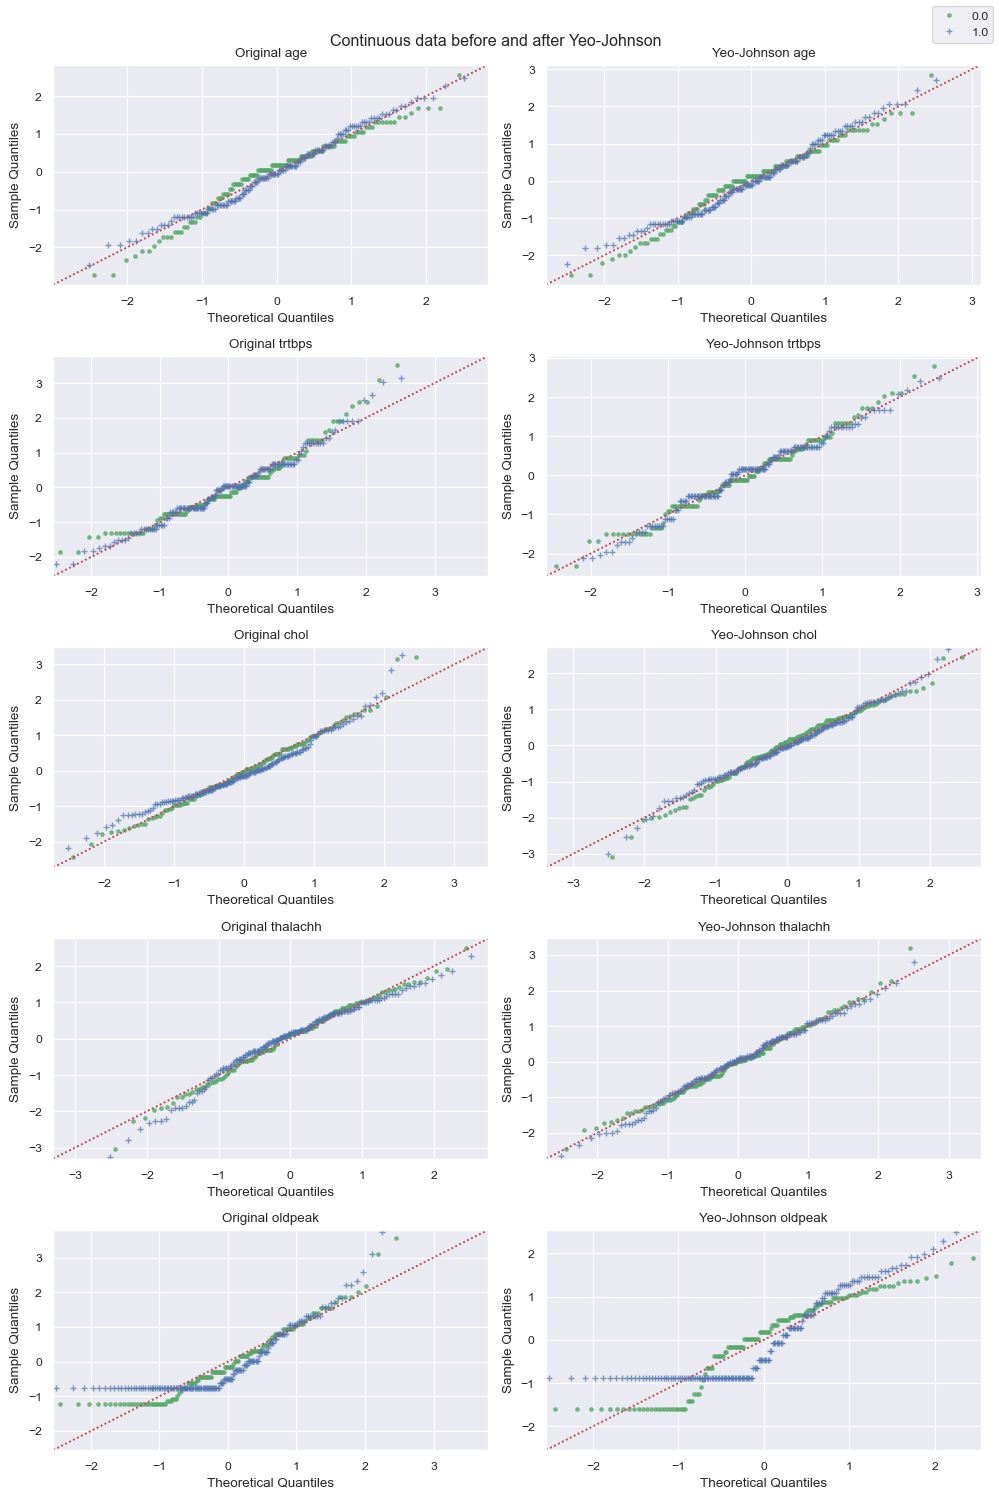

In [63]:
import statsmodels.api as sm
from scipy.stats import yeojohnson

sea.set_context('paper')


grouped = df_t.groupby(target)

fig, axes = plt.subplots(5, 2, figsize=(10, 15))
rows, col = 0, 0
for feature in list(df_t.columns)[:5]:
    for name, group in grouped:
        ax = axes[rows][col]
        color = 'b' if name==1 else 'g'
        marker = '+' if name==1 else '.'
        sm.qqplot(group[feature], ax=ax, marker=marker, markerfacecolor=color, 
                markeredgecolor=color, alpha=0.7, fit=True)
        sm.qqline(ax, line='45', fmt='r:')
        ax.set_title('Original ' + feature) 
    rows += 1
    
df_bxcx = df_t.copy()

def YJ(data):
    for column in data.columns[:5]:
        transformed_column, _ = yeojohnson(data[column])
        data[column] = transformed_column
    return data

df_yj = YJ(df_bxcx)
    
grouped = df_yj.groupby(target)
rows, col = 0, 1
for feature in list(df_yj.columns)[:5]:       
    for name, group in grouped:
        legend = (name if rows==1 and col==1 else None) 
        ax = axes[rows][col]
        color = 'b' if name==1 else 'g'
        marker = '+' if name==1 else '.'
        sm.qqplot(group[feature], ax=ax, marker=marker, markerfacecolor=color, 
                markeredgecolor=color, alpha=0.7, fit=True, label=legend)
        sm.qqline(ax, line='45', fmt='r:')
        ax.set_title('Yeo-Johnson ' + feature) 
    rows += 1

fig.legend(loc=1)
fig.suptitle('Continuous data before and after Yeo-Johnson')
fig.tight_layout()
fig.savefig('Continuous data before and after Yeo-Johnson', dpi=600)
fig.show()

In [67]:
X = df_yj.drop(target, axis=1)
y = df_yj[target]

Métodos de Validación (Técnicas de Remuestreo) aplicando Regresión logística

División por porcentaje.

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=5338)

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [21]:
lr.score(X_test, y_test)

0.8524590163934426

Validación cruzada

In [22]:
from sklearn.model_selection import KFold #iteraciones
from sklearn.model_selection import cross_val_score # Metodo de validacion = Validacion cruzada

num_folds = 10 # cuantas separaciones
kfold = KFold(n_splits = num_folds, shuffle=True)
result=cross_val_score(lr, X, y, cv=kfold) #La segunda posicion es hacia que lo vas a comparar
print(f"Accuracy: {result.mean()*100:,.2f}%, std {result.std():,.4f}")

Accuracy: 84.84%, std 0.0872


Validación cruzada con repeticiones.

In [23]:
from sklearn.model_selection import ShuffleSplit

test_size = 0.33
n_splits = 1000
kfold=ShuffleSplit(n_splits=n_splits, test_size=test_size)
result = cross_val_score(lr, X, y, cv=kfold)
print(f"Accuracy: {result.mean()*100:,.2f}%, std {result.std():,.4f}")

Accuracy: 84.12%, std 0.0313


Leave One Out

In [24]:
from sklearn.model_selection import LeaveOneOut

loocv = LeaveOneOut()
result = cross_val_score(lr, X, y, cv=loocv)
print(f"Accuracy: {result.mean()*100:,.2f}%, std {result.std():,.4f}")

Accuracy: 84.82%, std 0.3588


División por porcentaje repetidos aleatoriamente.

In [25]:
from sklearn.model_selection import ShuffleSplit

test_size = 0.2
n_splits = 1000

kfold = ShuffleSplit(n_splits = n_splits, test_size=test_size)
result = cross_val_score(lr, X, y, cv=kfold)

print(f"Accuracy:{result.mean()*100.0:,.2f}% std: {result.std():,.4f}")

Accuracy:84.52% std: 0.0444


## Métricas para evaluación de Algoritmos.

Matriz de confusión.

In [26]:
from sklearn.metrics import confusion_matrix

predicted = lr.predict(X)
matriz = confusion_matrix(y, predicted)
print(matriz)

[[112  26]
 [ 17 148]]


In [29]:
from sklearn.metrics import cohen_kappa_score

cohen_score = cohen_kappa_score(y, predicted)
print(f'Cohen score: {cohen_score:,.4f}')

Cohen score: 0.7124


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


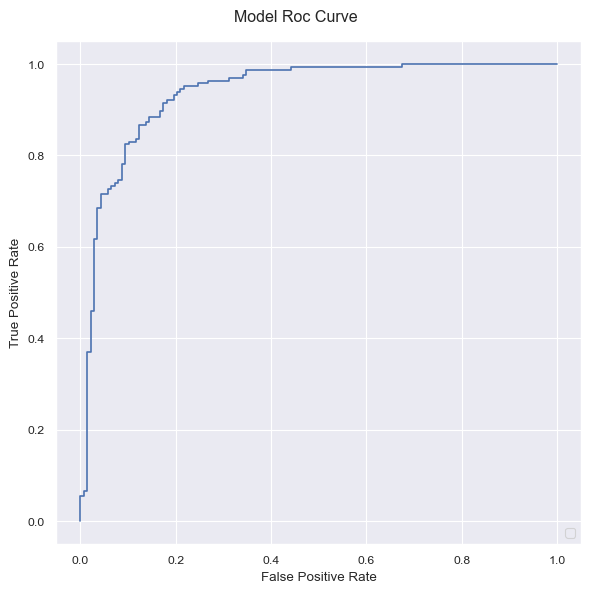

In [69]:
from sklearn.metrics import roc_curve 
from sklearn.metrics import RocCurveDisplay 

fig, ax = plt.subplots(figsize=(6, 6))
y_score = lr.decision_function(X)
fpr, tpr, _=roc_curve(y, y_score)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot(ax=ax)
fig.suptitle('Model Roc Curve')
fig.tight_layout()
fig.savefig('Model Roc Curve', dpi=600)